In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# import factor analyzer library
from factor_analyzer import FactorAnalyzer

# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#set working directory
# os.chdir(r'C:\Users\vixus\Documents\Python\Data Projects\Factor-analysis-Cluster-analysis-on-countries-classification')

#open raw data donwloaded from World Bank
data = pd.read_csv('raw data selected.csv')
data = data.sort_values(by=['Series Name', 'Country Name'])
data = data.set_index('Series Name')

In [2]:
indicators = sorted(set(data.index))
economies = sorted(set(data['Country Name']))
num_econ = len(economies)
columns = list(data.columns)
columns = columns[1:]
years = columns[2:]
yearlist = []

data = data[columns]

#set up a dataframe
df = pd.DataFrame(index = indicators, columns = economies)
datalog = pd.DataFrame(index = indicators)

In [3]:
#construct an usable dataframe
for indicator in indicators:
    
    year = 0
    
    #filtering out the indicators that too few countries provide
    for i in range(len(years)):
        if list(data.loc[indicator][years[i]] == '..').count(True) <= 35:
            if (year != 0) and (year != 1):
                if list(data.loc[indicator][years[i]] == '..').count(True) <= list(data.loc[indicator][years[year]] == '..').count(True):
                    year = i
            else:
                year = i
    
    #print the indicators and their latest years
    print(indicator, '-', years[year])
    yearlist.append(years[year])
    
    for economy in economies:
        try:
            #print(data.loc[data['Country Name'] == economy].loc[indicator].loc[years[year]])
            df.at[indicator, economy] = data.loc[data['Country Name'] == economy].loc[indicator].loc[years[year]]
        except:
            df.at[indicator, economy] = np.nan

Access to electricity, rural (% of rural population) - 2015 [YR2015]
Access to electricity, urban (% of urban population) - 2018 [YR2018]
Agriculture, forestry, and fishing, value added (% of GDP) - 2013 [YR2013]
Birth rate, crude (per 1,000 people) - 2014 [YR2014]
CO2 emissions (metric tons per capita) - 2014 [YR2014]
Current health expenditure (% of GDP) - 2011 [YR2011]
Death rate, crude (per 1,000 people) - 2014 [YR2014]
Diabetes prevalence (% of population ages 20 to 79) - 2019 [YR2019]
Employment in agriculture (% of total employment) (modeled ILO estimate) - 2019 [YR2019]
Employment in industry (% of total employment) (modeled ILO estimate) - 2019 [YR2019]
Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate) - 2019 [YR2019]
GDP growth (annual %) - 2014 [YR2014]
GDP per capita growth (annual %) - 2014 [YR2014]
Immunization, DPT (% of children ages 12-23 months) - 2018 [YR2018]
Individuals using the Internet (% of population) - 2017 [YR2017]
Industry (includ

In [4]:
#print the indicators and their years
datalog['Year'] = yearlist
#print(yearlist.count(years[0]))

datalog_selected = datalog[datalog['Year'] != years[0]] 
indicators_selected = list(datalog_selected.index)

df_selected = df.loc[indicators_selected]

indicators_count = []

for economy in economies:
    indicators_count.append(list(df_selected[economy] != '..').count(True))
    print(economy, '-', list(df_selected[economy] != '..').count(True))

print(indicators_count.count(datalog_selected.size))

Afghanistan - 29
Albania - 28
Algeria - 29
American Samoa - 9
Andorra - 16
Angola - 29
Antigua and Barbuda - 23
Argentina - 29
Armenia - 29
Aruba - 15
Australia - 29
Austria - 29
Azerbaijan - 29
Bahamas, The - 29
Bahrain - 29
Bangladesh - 29
Barbados - 25
Belarus - 29
Belgium - 29
Belize - 29
Benin - 29
Bermuda - 14
Bhutan - 29
Bolivia - 29
Bosnia and Herzegovina - 29
Botswana - 29
Brazil - 29
British Virgin Islands - 9
Brunei Darussalam - 29
Bulgaria - 28
Burkina Faso - 28
Burundi - 29
Cabo Verde - 29
Cambodia - 29
Cameroon - 29
Canada - 29
Cayman Islands - 18
Central African Republic - 28
Chad - 28
Channel Islands - 11
Chile - 29
China - 29
Colombia - 29
Comoros - 28
Congo, Dem. Rep. - 28
Congo, Rep. - 29
Costa Rica - 29
Cote d'Ivoire - 29
Croatia - 29
Cuba - 28
Curacao - 19
Cyprus - 29
Czech Republic - 29
Denmark - 29
Djibouti - 29
Dominica - 22
Dominican Republic - 29
Ecuador - 29
Egypt, Arab Rep. - 29
El Salvador - 29
Equatorial Guinea - 28
Eritrea - 19
Estonia - 29
Eswatini - 29


In [5]:
count = dict(zip(economies, indicators_count))

#show selected economies
economies_selected = {key: count[key] for key in count if (count[key] == datalog_selected.size)}
#show dropped economies
economies_dropped = {key: count[key] for key in count if (count[key] < datalog_selected.size) and (count[key] >= datalog_selected.size-2)}

df_final= df_selected[economies_selected.keys()]
df_final = df_final.astype(float)

df_dropped = df_selected[economies_dropped.keys()]

# Factor Analysis

<AxesSubplot:>

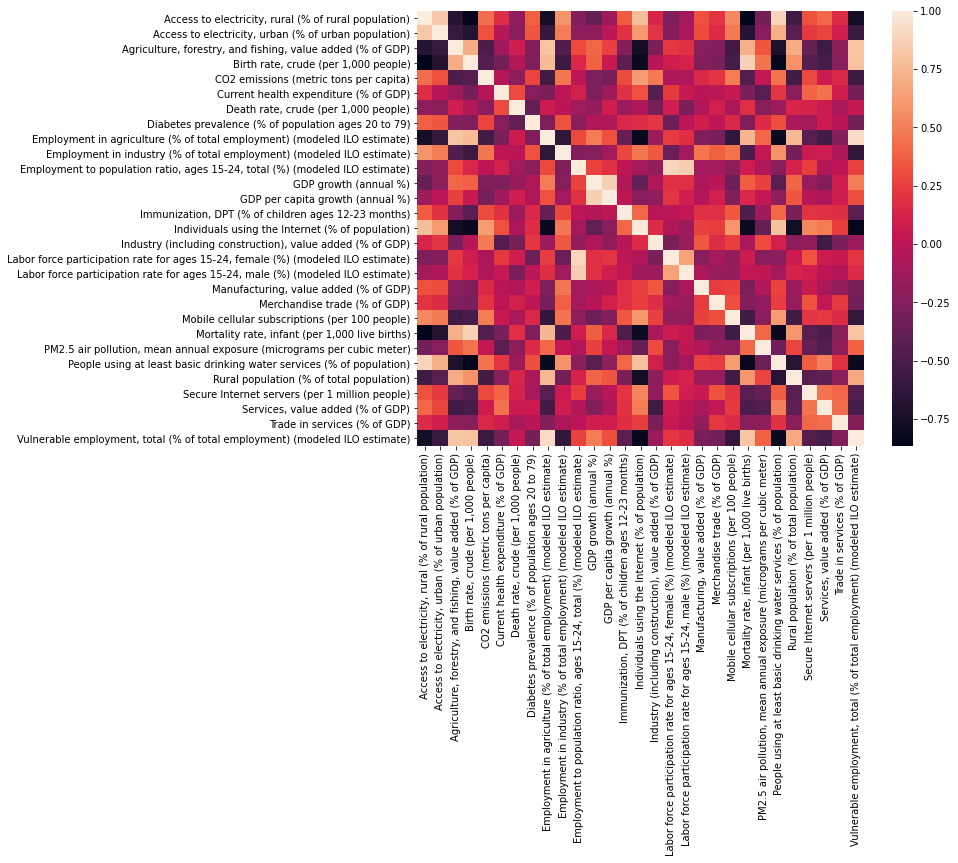

In [6]:
#Plot correlation matrix of indicators
plt.figure(figsize=(10,8))
corrMatrix = df_final.T.corr()
sns.heatmap(corrMatrix)

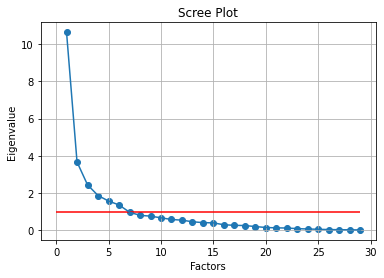

In [7]:
fa = FactorAnalyzer()
fa.fit(df_final.T, 25)

ev, v = fa.get_eigenvalues()

# Create scree plot using matplotlib
plt.figure(figsize=(6,4))
plt.scatter(range(1,df_final.T.shape[1]+1),ev)
plt.plot(range(1,df_final.T.shape[1]+1),ev)
plt.hlines(1, 0, df_final.T.shape[1], colors='r')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [8]:
#Perform Factor Analysis
fa = FactorAnalyzer(list(ev >= 0.95).count(True), rotation='varimax')
fa.fit(df_final.T)
loads = fa.loadings_
print(loads)
loads = pd.DataFrame(loads, index=df_final.index)

[[ 9.23098526e-01 -1.03622446e-01 -1.69952166e-02 -7.56397855e-02
   1.68627738e-01  1.10811847e-01 -1.14156059e-01]
 [ 7.98886224e-01 -9.90136339e-02  1.29566705e-01  5.58118564e-02
   1.95405415e-01 -3.14623996e-03 -1.59213710e-01]
 [-7.95819252e-01  1.74389934e-01  1.66881373e-01 -1.14388489e-01
   1.96068509e-03 -4.57541320e-02 -2.01373796e-01]
 [-8.91906248e-01  2.30633642e-02 -7.62999725e-04  1.36760614e-01
   9.41647244e-02 -2.26881609e-01 -1.77341599e-02]
 [ 4.52723131e-01  7.12844933e-02 -2.67657041e-01  3.89566272e-01
   1.77486586e-01  3.09021366e-01  2.82098090e-01]
 [ 2.39313737e-01  1.60354754e-01 -1.90260850e-01 -4.12831611e-01
  -4.32465948e-01  5.07667670e-02  8.24092657e-02]
 [-1.38157883e-01 -1.74289200e-01 -1.46401451e-02 -1.78776087e-01
  -6.98574016e-01  1.20222729e-01 -1.05104484e-01]
 [ 2.69447018e-01 -1.39315080e-01 -8.37283357e-03 -5.00170433e-03
   5.67907855e-01  1.21559816e-01 -6.78056048e-02]
 [-8.20959003e-01  1.45347400e-01  2.61796903e-01  2.25746080e-0

<AxesSubplot:>

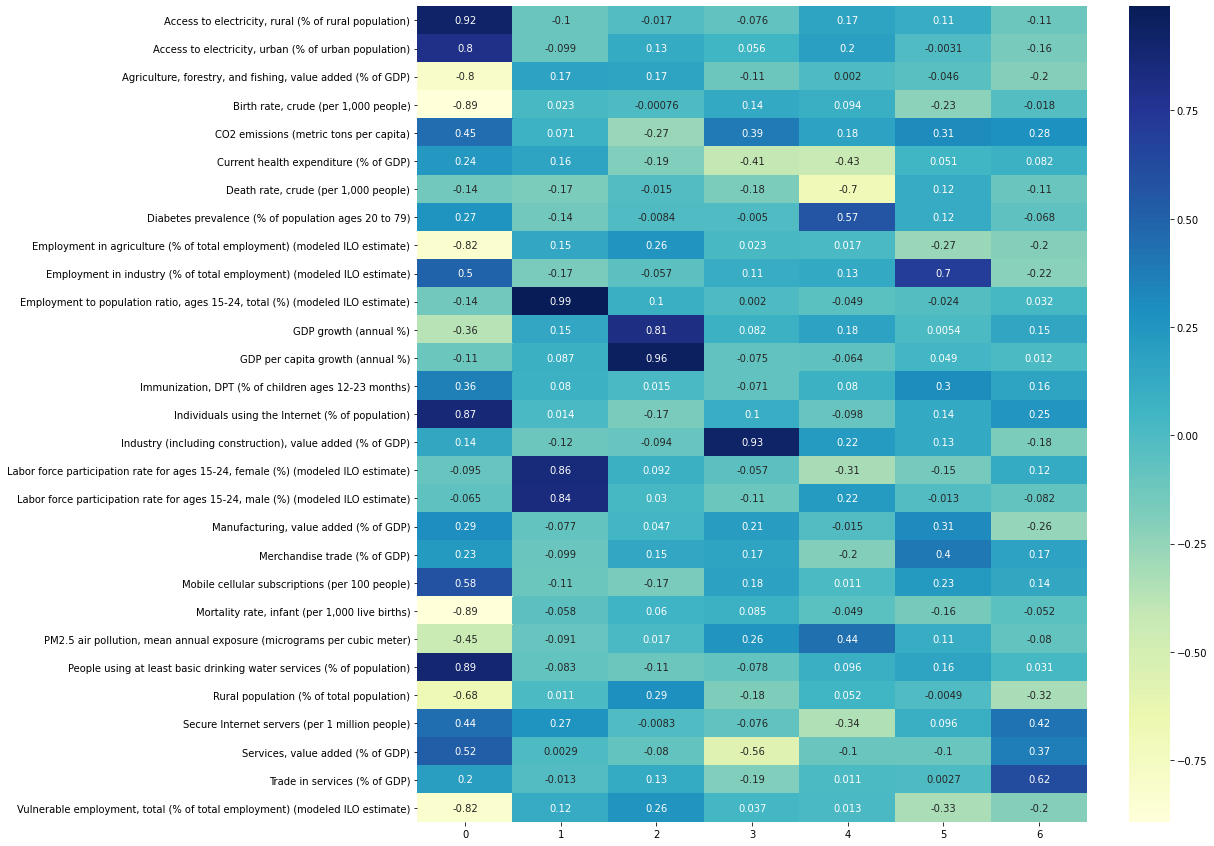

In [9]:
#Heatmap of loadings
plt.figure(figsize=(15,15))
sns.heatmap(loads, annot=True, cmap="YlGnBu")

In [10]:
# Get variance of each factors
fa_var = fa.get_factor_variance()
fa_var = pd.DataFrame(fa_var, index=['SS loadings', 'Proportion Var', 'Cumulative Var'])
print(fa_var)

                       0         1         2         3         4         5  \
SS loadings     9.176603  2.777247  2.099143  1.891124  1.748366  1.401925   
Proportion Var  0.316435  0.095767  0.072384  0.065211  0.060288  0.048342   
Cumulative Var  0.316435  0.412202  0.484586  0.549797  0.610086  0.658428   

                       6  
SS loadings     1.400185  
Proportion Var  0.048282  
Cumulative Var  0.706710  


# Cluster Analysis

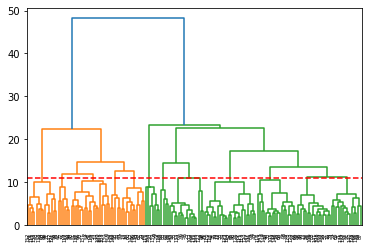

In [11]:
#standardization along columns
df_final_std=(df_final.T-df_final.T.mean())/df_final.T.std()

#Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_final_std, method='ward'))
plt.axhline(y=11, color='r', linestyle='--')

<AxesSubplot:xlabel='cluster'>

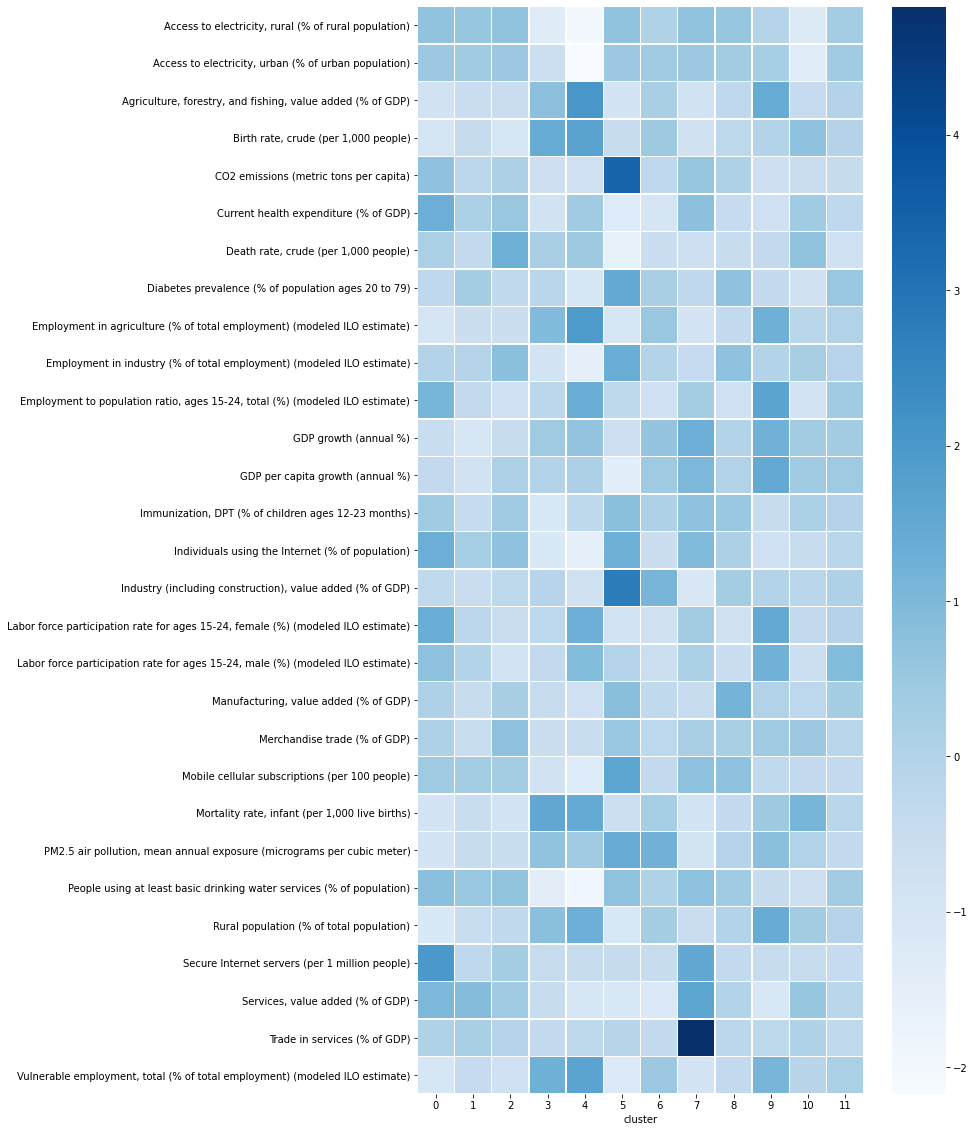

In [12]:
# create clusters
hc = AgglomerativeClustering(n_clusters=12, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(df_final_std)

df_final_T = df_final.T
df_final_T['cluster'] = y_hc
df_final_T.sort_values("cluster", inplace = True, ascending=True)

df_final_std['cluster'] = y_hc
df_final_std.sort_values("cluster", inplace = True, ascending=True)

df_cluster = df_final_T.groupby('cluster').mean()
df_cluster_std = df_final_std.groupby('cluster').mean()

#Heatmap of cluster characteristics
plt.figure(figsize=(10,20))
sns.heatmap(df_cluster_std.T, cmap="Blues", linewidths=.5)

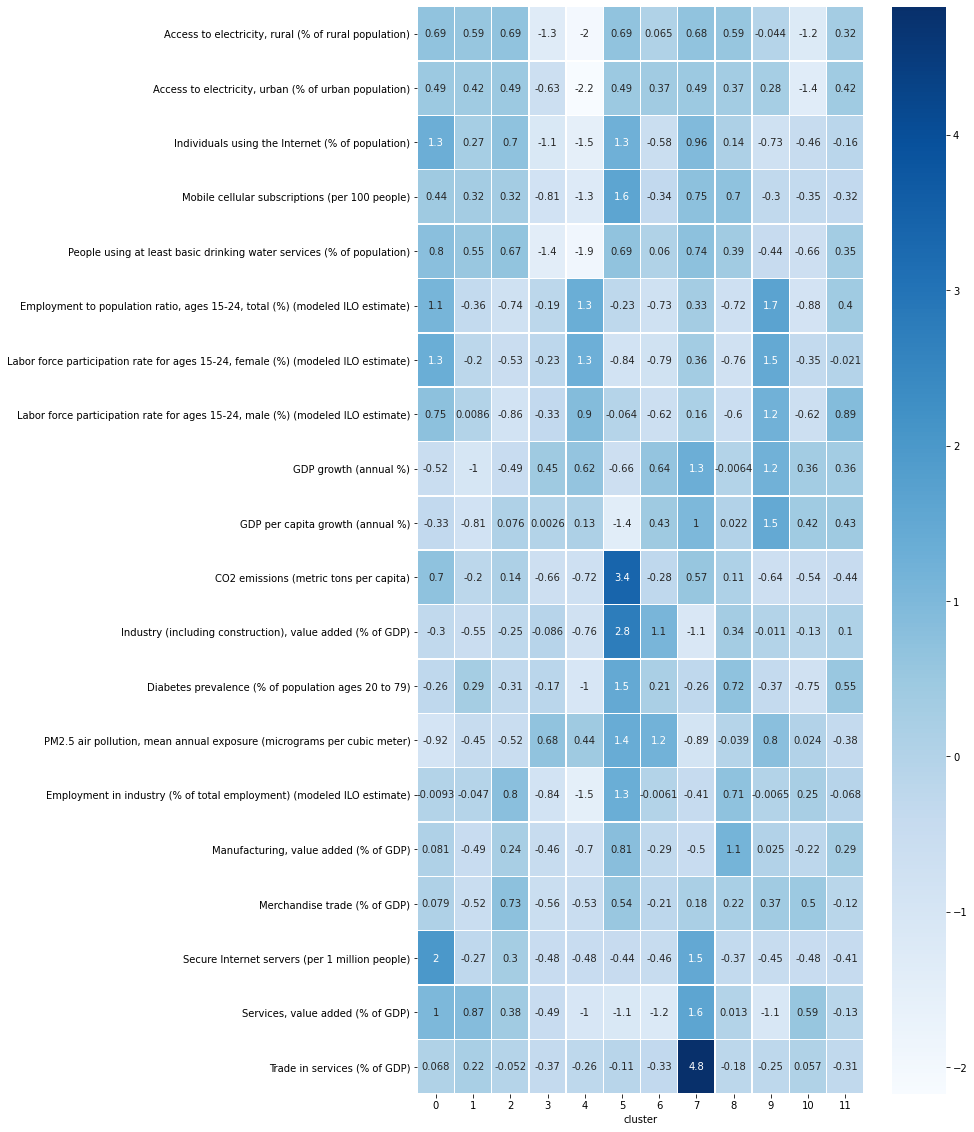

In [13]:
#Heatmap of cluster characteristics based on factor analysis
f0 = [indicators[i] for i in (0, 1, 14, 20, 23)]
f1 = [indicators[i] for i in (10, 16, 17)]
f2 = [indicators[i] for i in (11, 12)]
f3 = [indicators[i] for i in (4, 15)]
f4 = [indicators[i] for i in (7, 22)]
f5 = [indicators[i] for i in (9, 18, 19)]
f6 = [indicators[i] for i in (25, 26, 27)]

indicators_factor = f0 + f1 + f2 + f3 + f4 + f5 + f6
df_cluster_std_selected = df_cluster_std.T.loc[indicators_factor]

#Heatmap of cluster characteristics
plt.figure(figsize=(10,20))
sns.heatmap(df_cluster_std_selected, annot=True, cmap="Blues", linewidths=.5)

In [32]:
#count the number of countries in cluster
num_of_countries = []
for n in range(len(set(y_hc))):
    num_of_countries.append(sum(df_final_T['cluster'] == n))
    
df_cluster['num of countries'] = num_of_countries
df_cluster_std['num of countries'] = num_of_countries

columns = list(df_cluster.columns)
columns = columns[-1:] + columns[:-1]

df_cluster = df_cluster.reindex(columns=columns)
df_cluster_std = df_cluster_std.reindex(columns=columns)

# Output as excel

In [34]:
output = 'output_' + time.asctime(time.localtime(time.time())).replace(' ','_').replace(':','') + '.xlsx'

with pd.ExcelWriter(output) as writer:
    df_cluster.to_excel(writer, sheet_name='Cluster')
    df_cluster_std.to_excel(writer, sheet_name='Cluster_std')
    df_cluster_std_selected.to_excel(writer, sheet_name='Cluster_std_selected')
    df_final_T.to_excel(writer, sheet_name='Result')
    df_final_std.to_excel(writer, sheet_name='Result_std')
    df_final.to_excel(writer, sheet_name='Final data')
    df_dropped.to_excel(writer, sheet_name='Dropped')
    df.to_excel(writer, sheet_name='Raw data')
    loads.to_excel(writer, sheet_name='Loading')
    corrMatrix.to_excel(writer, sheet_name='Correlation Matrix')
    datalog.to_excel(writer, sheet_name='Datalog')
    datalog_selected.to_excel(writer, sheet_name='Datalog_selected')

# Variable Check!!

In [23]:
df_final_std

,"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Agriculture, forestry, and fishing, value added (% of GDP)","Birth rate, crude (per 1,000 people)",CO2 emissions (metric tons per capita),Current health expenditure (% of GDP),"Death rate, crude (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),...,Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Rural population (% of total population),Secure Internet servers (per 1 million people),"Services, value added (% of GDP)",Trade in services (% of GDP),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)",cluster
Japan,0.685845,0.488612,-0.902535,-1.289152,0.762105,1.641695,0.872797,-0.469325,-0.942993,0.540943,...,0.514025,-1.001090,-0.807442,0.739794,-1.459280,0.014441,1.392743,-0.557443,-1.046142,0
Singapore,0.685845,0.488612,-1.004101,-1.111259,0.902153,-1.174436,-1.129615,-0.494345,-1.073413,-0.577678,...,1.208745,-0.973440,-0.430428,0.811528,-1.850921,4.382069,1.380425,2.466916,-0.994161,0
Denmark,0.685845,0.488612,-0.883742,-1.081610,0.184834,1.465844,0.501980,0.206209,-1.002811,-0.196709,...,0.481874,-0.901552,-0.893093,0.811529,-1.278962,3.144742,0.971727,0.461247,-1.176649,0
Sweden,0.685845,0.488612,-0.868132,-0.903717,-0.037393,1.660361,0.539061,-0.669483,-1.028828,-0.267918,...,0.640968,-0.978970,-1.089692,0.811528,-1.206168,0.647409,0.978888,0.009959,-1.131974,0
Switzerland,0.685845,0.488612,-0.941579,-1.051961,-0.057775,1.699245,0.019917,-0.444305,-0.965915,0.024294,...,0.835034,-0.896022,-0.879112,0.811528,-0.694592,2.249357,1.421511,0.200924,-1.021892,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mexico,0.622427,0.488612,-0.709365,-0.212702,-0.114837,-0.222021,-0.769923,1.507236,-0.498781,0.779366,...,-0.669044,-0.492340,-0.336200,0.645996,-0.891048,-0.465719,0.506317,-0.657154,-0.333749,11
Guyana,0.269375,0.230402,0.567191,-0.024827,-0.333790,-0.424477,-0.216664,1.031861,-0.279818,0.356943,...,-1.232777,0.287373,-0.261832,0.443536,1.376574,-0.478417,-0.841428,-0.161020,-0.388025,11
Guatemala,0.267764,0.130212,-0.024120,0.488988,-0.609159,-0.132841,-1.064351,0.631544,0.414258,-0.186918,...,0.068867,0.121477,-0.175161,0.331093,0.398634,-0.475140,0.566957,-0.442924,0.072115,11
Nicaragua,-0.410122,0.483006,0.558368,0.117290,-0.633139,0.431358,-1.007616,0.981821,0.373735,-0.519058,...,0.235626,-0.232436,-0.505288,-0.347326,0.029752,-0.470953,-0.496588,-0.199836,0.199370,11


array([[<AxesSubplot:title={'center':'Access to electricity, rural (% of rural population)'}>,
        <AxesSubplot:title={'center':'Access to electricity, urban (% of urban population)'}>,
        <AxesSubplot:title={'center':'Agriculture, forestry, and fishing, value added (% of GDP)'}>,
        <AxesSubplot:title={'center':'Birth rate, crude (per 1,000 people)'}>,
        <AxesSubplot:title={'center':'CO2 emissions (metric tons per capita)'}>],
       [<AxesSubplot:title={'center':'Current health expenditure (% of GDP)'}>,
        <AxesSubplot:title={'center':'Death rate, crude (per 1,000 people)'}>,
        <AxesSubplot:title={'center':'Diabetes prevalence (% of population ages 20 to 79)'}>,
        <AxesSubplot:title={'center':'Employment in agriculture (% of total employment) (modeled ILO estimate)'}>,
        <AxesSubplot:title={'center':'Employment in industry (% of total employment) (modeled ILO estimate)'}>],
       [<AxesSubplot:title={'center':'Employment to population rati

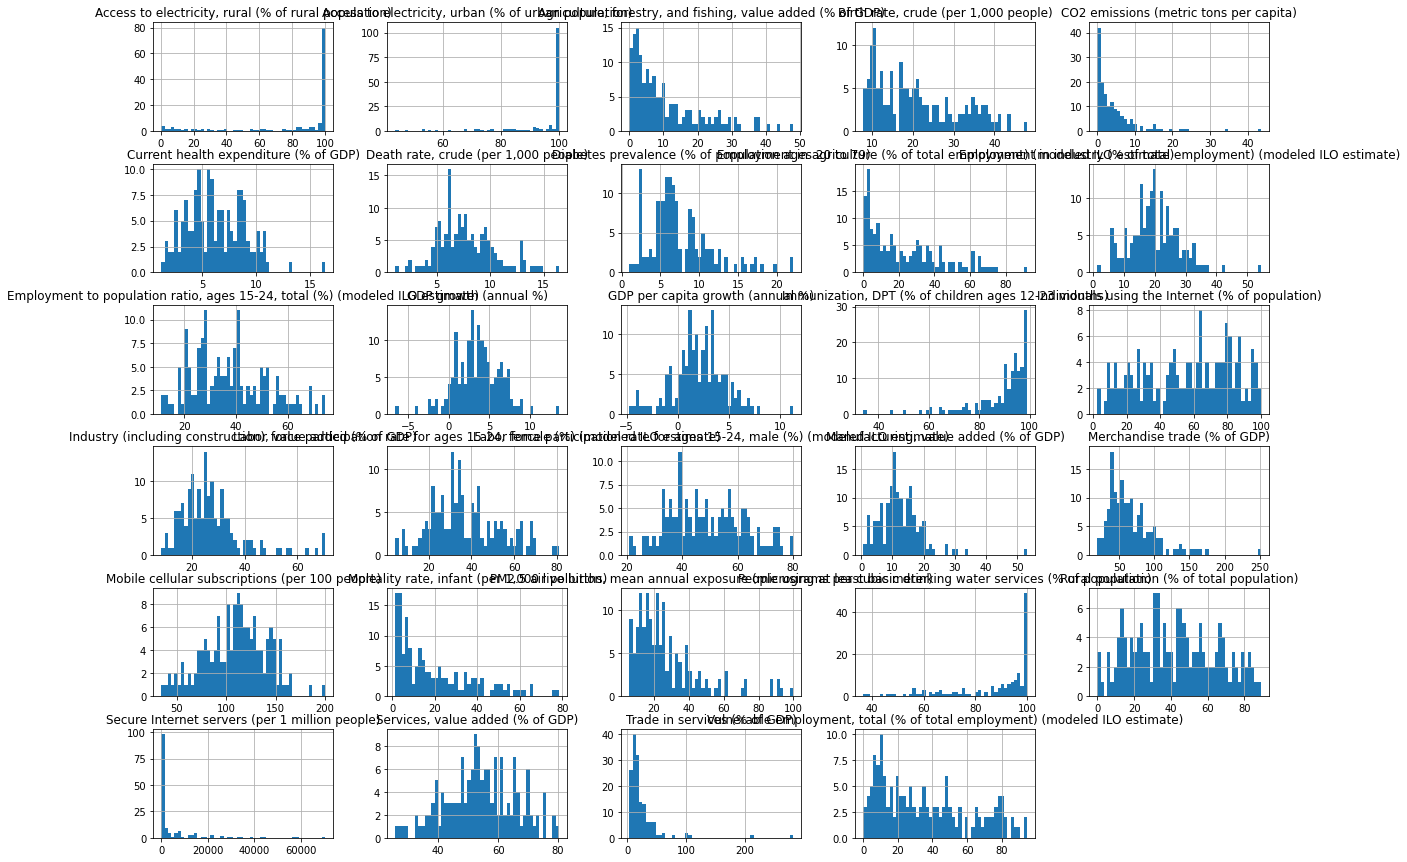

In [16]:
df_final.T.hist(bins=50, figsize=(20,15))

In [18]:
df_final_T

,"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Agriculture, forestry, and fishing, value added (% of GDP)","Birth rate, crude (per 1,000 people)",CO2 emissions (metric tons per capita),Current health expenditure (% of GDP),"Death rate, crude (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),...,Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Rural population (% of total population),Secure Internet servers (per 1 million people),"Services, value added (% of GDP)",Trade in services (% of GDP),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)",cluster
Japan,100.000000,100.000000,1.104187,8.000,9.480766,10.616717,10.100,5.6,3.423000,24.268999,...,125.451863,1.8,11.704778,98.849375,8.931,5980.236099,70.487219,7.347134,8.307000,0
Singapore,100.000000,100.000000,0.034427,9.800,10.355943,3.189135,4.700,5.5,0.726000,15.472000,...,147.225969,2.3,19.078256,100.000000,0.000,58690.333450,70.344198,101.776904,9.666000,0
Denmark,100.000000,100.000000,1.302128,10.100,5.873334,10.152908,9.100,8.3,2.186000,18.468000,...,124.444165,3.6,10.029653,100.000003,13.043,43757.827430,65.598608,39.153780,4.895000,0
Sweden,100.000000,100.000000,1.466540,11.900,4.484611,10.665949,9.200,4.8,1.648000,17.908001,...,129.430535,2.2,6.184665,99.999996,14.703,13619.120400,65.681752,25.063163,6.063000,0
Switzerland,100.000000,100.000000,0.692951,10.400,4.357240,10.768506,7.800,5.7,2.949000,20.205999,...,135.513016,3.7,10.303100,100.000000,26.369,32951.996250,70.821260,31.025699,8.941000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mexico,97.851774,100.000000,3.138784,18.892,4.000653,5.701141,5.670,13.5,12.609000,26.143999,...,88.371756,11.0,20.921116,97.344831,21.889,185.482420,60.194516,4.233858,26.932000,11
Guyana,85.892517,96.922752,16.584291,20.793,2.632393,5.167162,7.162,11.6,17.136999,22.822001,...,70.703072,25.1,22.375575,94.097354,73.600,32.248868,44.545209,19.724699,25.512999,11
Guatemala,85.837941,95.728729,10.356221,25.992,0.911580,5.936357,4.876,10.0,31.490000,18.545000,...,111.499579,22.1,24.070649,92.293750,51.299,71.795238,60.898633,10.922780,37.543001,11
Nicaragua,62.875256,99.933189,16.491364,22.231,0.761728,7.424437,5.029,11.4,30.652000,15.933000,...,116.726191,15.7,17.614180,81.411804,42.887,122.320711,48.549305,18.512732,40.870000,11


In [20]:
df_cluster_std

,num of countries,"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Agriculture, forestry, and fishing, value added (% of GDP)","Birth rate, crude (per 1,000 people)",CO2 emissions (metric tons per capita),Current health expenditure (% of GDP),"Death rate, crude (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Employment in agriculture (% of total employment) (modeled ILO estimate),...,Merchandise trade (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Rural population (% of total population),Secure Internet servers (per 1 million people),"Services, value added (% of GDP)",Trade in services (% of GDP),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)"
cluster,,,,,,,,,,,,,,,,,,,,,
0,16,0.685845,0.488612,-0.821474,-0.995258,0.701525,1.301664,0.157050,-0.258221,-0.989422,...,0.078607,0.440136,-0.930584,-0.920311,0.801341,-1.114959,1.985062,1.017177,0.067586,-1.037861
1,18,0.588235,0.424158,-0.532142,-0.430621,-0.200971,0.166454,-0.316784,0.293778,-0.581727,...,-0.521204,0.323291,-0.524291,-0.450783,0.547980,-0.515791,-0.268412,0.873150,0.218120,-0.413350
2,24,0.685821,0.487475,-0.542901,-1.034930,0.143247,0.560294,1.250211,-0.311909,-0.568665,...,0.727920,0.322891,-0.838419,-0.522592,0.665696,-0.302749,0.303717,0.382376,-0.051921,-0.744688
3,18,-1.311815,-0.629377,0.778130,1.410281,-0.662833,-0.831342,0.197168,-0.173258,0.937224,...,-0.561010,-0.810831,1.536205,0.677195,-1.410929,0.800989,-0.477878,-0.493495,-0.372529,1.248957
4,14,-2.023712,-2.170925,2.061577,1.686342,-0.718986,0.372166,0.473241,-1.035844,1.933697,...,-0.525927,-1.261485,1.447464,0.440166,-1.902266,1.299197,-0.480292,-1.035935,-0.255078,1.663895
5,7,0.685845,0.488612,-0.931484,-0.463150,3.397362,-1.265613,-1.604261,1.475068,-1.001499,...,0.535413,1.607620,-0.621898,1.383072,0.688842,-1.067402,-0.440076,-1.110476,-0.110481,-1.188304
6,11,0.064928,0.371683,0.201551,0.475726,-0.282542,-0.995588,-0.593481,0.206209,0.550002,...,-0.209339,-0.338711,0.266762,1.215502,0.059601,0.304082,-0.463051,-1.163359,-0.331466,0.501300
7,4,0.683962,0.488612,-0.818148,-0.792534,0.569000,0.771444,-0.660810,-0.262912,-0.926153,...,0.184243,0.748802,-0.844870,-0.891049,0.743948,-0.553323,1.510388,1.618432,4.824757,-0.928784
8,14,0.588460,0.365270,-0.271414,-0.249685,0.110093,-0.397236,-0.503120,0.717326,-0.372630,...,0.220588,0.704930,-0.375818,-0.039485,0.391899,-0.004750,-0.367294,0.013428,-0.177940,-0.344866


In [25]:
df_cluster_std.T.loc[indicators_factor]

cluster,0,1,2,3,4,5,6,7,8,9,10,11
"Access to electricity, rural (% of rural population)",0.685845,0.588235,0.685821,-1.311815,-2.023712,0.685845,0.064928,0.683962,0.588460,-0.044277,-1.239041,0.318087
"Access to electricity, urban (% of urban population)",0.488612,0.424158,0.487475,-0.629377,-2.170925,0.488612,0.371683,0.488612,0.365270,0.278443,-1.353191,0.419975
Individuals using the Internet (% of population),1.300384,0.266892,0.704607,-1.123647,-1.541375,1.267124,-0.583618,0.959621,0.140900,-0.725013,-0.460254,-0.161901
Mobile cellular subscriptions (per 100 people),0.440136,0.323291,0.322891,-0.810831,-1.261485,1.607620,-0.338711,0.748802,0.704930,-0.303620,-0.349421,-0.320762
People using at least basic drinking water services (% of population),0.801341,0.547980,0.665696,-1.410929,-1.902266,0.688842,0.059601,0.743948,0.391899,-0.435198,-0.660729,0.347946
"Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)",1.108796,-0.364565,-0.737065,-0.187144,1.341489,-0.231019,-0.732642,0.325201,-0.719218,1.676380,-0.884930,0.404430
"Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)",1.336903,-0.199446,-0.533406,-0.230368,1.279419,-0.836952,-0.790460,0.359765,-0.761255,1.487477,-0.348167,-0.021254
"Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)",0.751098,0.008614,-0.856508,-0.329087,0.902431,-0.064199,-0.623746,0.163128,-0.596112,1.222776,-0.619142,0.892359
GDP growth (annual %),-0.522122,-1.017972,-0.493726,0.449014,0.621429,-0.658845,0.639374,1.326494,-0.006445,1.219354,0.364932,0.363831
GDP per capita growth (annual %),-0.327950,-0.808870,0.075874,0.002614,0.125280,-1.401613,0.431200,1.024489,0.021794,1.482090,0.419872,0.432516


In [31]:
columns = list(df_cluster.columns)
columns[-1]
# columns = columns[-1:] + columns[:-1]

'Vulnerable employment, total (% of total employment) (modeled ILO estimate)'